In [8]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [18]:
# Load the local CSV dataset
file_path = '../Datasets/spotifyDataset.csv'
df = pd.read_csv(file_path)

# Preview the dataset to understand its structure
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [19]:
# Drop rows with missing values in 'energy' and 'valence' columns
df = df.dropna(subset=['energy', 'valence'])

# Rescale 'energy' and 'valence' to a range of 0 to 1 using Min-Max scaling
scaler = MinMaxScaler()
df[['energy', 'valence']] = scaler.fit_transform(df[['energy', 'valence']])

# Check the first few rows after scaling
df[['energy', 'valence']].head()


,energy,valence
0,0.4610,0.718593
1,0.1660,0.268342
2,0.3590,0.120603
3,0.0596,0.143719
4,0.4430,0.167839


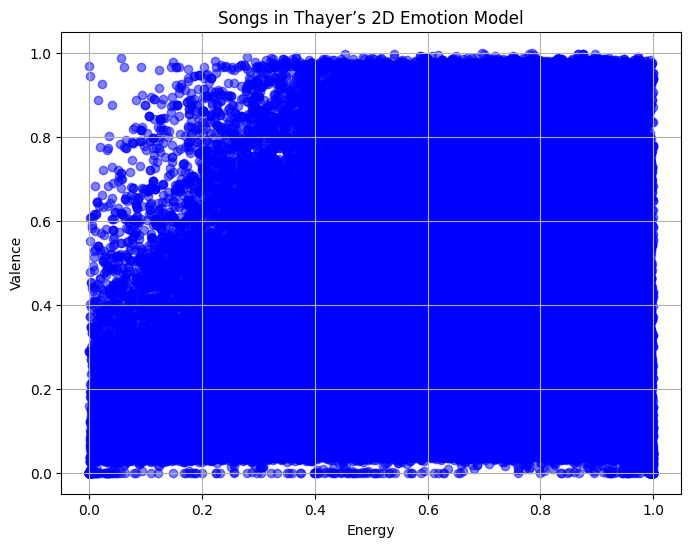

In [20]:
# Plot Energy vs. Valence to visualize the emotional content of songs
plt.figure(figsize=(8, 6))
plt.scatter(df['energy'], df['valence'], c='blue', alpha=0.5)
plt.xlabel('Energy')
plt.ylabel('Valence')
plt.title('Songs in Thayer’s 2D Emotion Model')
plt.grid(True)
plt.show()

In [21]:
# Categorizing Songs based on Thayer’s 2D Emotion Model
def categorize_emotion(row):
    if row['energy'] > 0.7 and row['valence'] > 0.5:
        return 'Happy'
    elif row['energy'] < 0.3 and row['valence'] < 0.3:
        return 'Sad'
    elif row['energy'] < 0.3 and row['valence'] > 0.6:
        return 'Relaxed'
    elif row['energy'] > 0.7 and row['valence'] < 0.3:
        return 'Angry'
    else:
        return 'Neutral'

# Apply the emotion categorization function
df['emotion'] = df.apply(categorize_emotion, axis=1)

# Check the distribution of emotions in the dataset
df['emotion'].value_counts()


emotion
Neutral    62170
Happy      29671
Angry      12521
Sad         8299
Relaxed     1339
Name: count, dtype: int64

In [23]:
# Display the column names to check the available columns
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'emotion'],
      dtype='object')

In [25]:
df[['track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'emotion']]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,emotion
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.718593,87.917,4,acoustic,Neutral
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.268342,77.489,4,acoustic,Sad
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120603,76.332,4,acoustic,Neutral
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143719,181.740,3,acoustic,Sad
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167839,119.949,4,acoustic,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.034070,125.995,5,world-music,Sad
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.035176,85.239,4,world-music,Sad
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.746734,132.378,4,world-music,Neutral
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.415075,135.960,4,world-music,Neutral
